# Facebook Prophet

In this notebook, we show examples of how Facebook Prophet can be used with darts. This model is especially suited for time series with strong seasonal effects and allows to specify hollidays or special events.

The dataset used in this example is the one from the quick start tutorial in [FB Prophet's documentation](https://facebook.github.io/prophet/docs/quick_start.html#python-api). It contains the daily (log of the) number of Wikipedia page views for Peyton Manning

In [1]:
# fix python path if working locally
from utils import fix_pythonpath_if_working_locally
fix_pythonpath_if_working_locally()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import Prophet
from darts.metrics import mape, mase
from darts.utils.missing_values import auto_fillna

## Constructing `TimeSeries` instances for training and validation

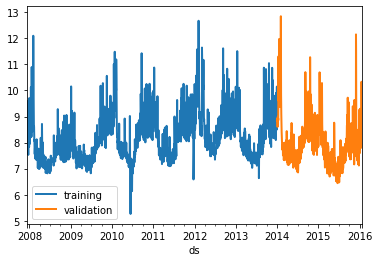

In [3]:
df = pd.read_csv('wiki_log_peyton_manning.csv', delimiter=',')
series = auto_fillna(TimeSeries.from_dataframe(df, 'ds', ['y'], freq='D'))

train, val = series.split_before(pd.Timestamp('20140101'))
train.plot(lw=2, label='training')
val.plot(lw=2, label='validation')
plt.legend()


## Making a simple forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


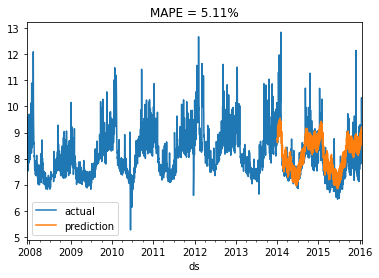

In [4]:
model = Prophet()
model.fit(train)
forecast = model.predict(len(val))

series.plot(label='actual')
forecast.plot(label='prediction')
plt.title('MAPE = {:.2f}%'.format(mape(series, forecast)))
plt.legend()

## Modelling hollidays and special events

Prophet allows to specify special events

## Backtesting the model

We can look at the performance the model would have achieved if it had been making predictions every 15 days (`stride=15`) about the next 30-day window (`forecast_horizon=30`)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

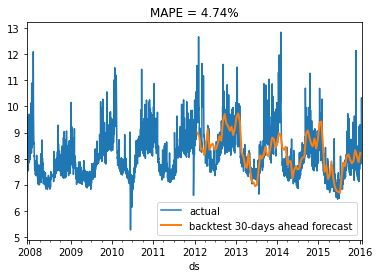

In [5]:
historical_forecast = model.backtest(series, stride=15, forecast_horizon=30, verbose=True)

series.plot(label='actual')
historical_forecast.plot(label="backtest 30-days ahead forecast", lw=2)

plt.title('MAPE = {:.2f}%'.format(mape(series, historical_forecast)))

plt.legend()